# Competition: Sberbank Russian Housing Market

Group Members:
* Bayan Ali
* Majid Sohrabi

Group: ISSA (Data Science)

# Data Preprocessing 1

In [261]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
import datetime

In [262]:
device = 'cuda'

In [263]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [264]:
#load data
train = pd.read_csv('/content/drive/MyDrive/MLDM-Competition-HSE/Data/train.csv', parse_dates=['timestamp'])
test = pd.read_csv('/content/drive/MyDrive/MLDM-Competition-HSE/Data/test.csv', parse_dates=['timestamp'])

In [265]:
train[:5]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [266]:
test[:5]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [267]:
id_test = test.id
id_train = train.id

In [268]:
#preprocessing Data / cleaning Data
# Train Data
# 1.full_sq: total area in square meters, including loggias, balconies and other non-residential areas
# life_sq: living area in square meters, excluding loggias, balconies and other non-residential areas
# so life_sq <= full_sq and if life_sq > full_sq we will put NaN 
index = train[train.life_sq > train.full_sq].index
train.iloc[index]["life_sq"] = np.NaN
# 2. Put NaN when life_sq < 5
index = train[train.life_sq < 5].index
train.iloc[index]["life_sq"] = np.NaN
# 3. Put NaN when full_sq < 5
index = train[train.full_sq < 5].index
train.iloc[index]["full_sq"] = np.NaN
# 4. train.iloc[13117]["kitch_sq"] = 1970.0  # the value should be for build_year
train.iloc[13117]["build_year"] = train.iloc[13117]["kitch_sq"]
# 5. kitch_sq should be < life_sq so if kitch_sq >= life_sq ==> NaN
index = train[train.kitch_sq >= train.life_sq].index
train.iloc[index]["kitch_sq"] = np.NaN
# 6. if  num_room = 0 ==> num_room = NaN
index = train[train.num_room == 0].index 
train.iloc[index]["num_room"] = np.NaN
# 7. replace with NaN if num romm >= 6 
#index = [10076, 11621, 17764, 19390, 24007, 26713, 29172]
index = train.iloc[(train.num_room >= 6).values].index
train.iloc[index]["num_room"] = np.NaN
# 8.
index = train[train.floor == 0].index
train.iloc[index]["floor"] = np.NaN
index = train[train.max_floor == 0].index
train.iloc[index]["max_floor"] = np.NaN
# 9. floor should be <= max floor
index = train[train.floor > train.max_floor].index
train.iloc[index]["max_floor"] = np.NaN
# 10. there are just 4 conditions
index = train.iloc[(train.state >= 5).values].index
train.iloc[index]["state"] = np.NaN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [269]:
# Test Data
# 1. Same in pint 1 for train data.
index = test[test.life_sq > test.full_sq].index
test.iloc[index]["life_sq"] = np.NaN
# 2. life_sq for these index [601,1896,2791] equal full_sq but need (.)
index = [601,1896,2791]
test.iloc[index]["life_sq"] = test.iloc[index]["full_sq"]
# 3. Put NaN when life_sq < 5
index = test[test.life_sq < 5].index
test.iloc[index]["life_sq"] = np.NaN
# 4. Put NaN when full_sq < 5
index = test[test.full_sq < 5].index
test.iloc[index]["full_sq"] = np.NaN
# 5. kitch_sq should be < life_sq so if kitch_sq >= life_sq ==> NaN
index = test[test.kitch_sq >= test.life_sq].index
test.iloc[index]["kitch_sq"] = np.NaN
# 6. if  num_room = 0 ==> num_room = NaN
index = test[test.num_room == 0].index 
test.iloc[index]["num_room"] = np.NaN
# 7. 
bad_index = [3174, 7313]
test.iloc[bad_index]["num_room"] = np.NaN
# 8.
index = test[test.max_floor == 0].index
test.iloc[index]["max_floor"] = np.NaN
index = test[test.floor == 0].index
test.iloc[index]["floor"] = np.NaN
# 9. 
index = test[test.floor > test.max_floor].index
test.iloc[index]["max_floor"] = np.NaN

# 10.
index = test.iloc[(test.state >= 5).values].index
test.iloc[index]["state"] = np.NaN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [270]:
train.product_type.value_counts(normalize= True)
test.product_type.value_counts(normalize= True)

Investment       0.655132
OwnerOccupier    0.344868
Name: product_type, dtype: float64

In [271]:
train['month'] = train.timestamp.dt.month
train['day'] = train.timestamp.dt.dayofweek

test['month'] = test.timestamp.dt.month
test['day'] = test.timestamp.dt.dayofweek

In [272]:
# Add some other feature engineering
train['rel_floor'] = train['floor'] / train['max_floor'].astype(float)
train['rel_kitch_sq'] = train['kitch_sq'] / train['full_sq'].astype(float)

test['rel_floor'] = test['floor'] / test['max_floor'].astype(float)
test['rel_kitch_sq'] = test['kitch_sq'] / test['full_sq'].astype(float)

train['room_size'] = train['life_sq'] / train['num_room'].astype(float)
test['room_size'] = test['life_sq'] / test['num_room'].astype(float)


In [273]:
# let's sort the train data
#train = train.sort_values(by=["price_doc"])

In [274]:
y_train = train["price_doc"]
x_train = train.drop(["id", "timestamp", "price_doc"], axis=1)
x_test = test.drop(["id", "timestamp"], axis=1)

In [275]:
'''
for c in x_train.columns:    
    if x_train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()  ## Encode target labels with value between 0 and n_classes-1.
        lbl.fit(list(x_train[c].values))  # Fit label encoder.
        x_train[c] = lbl.transform(list(x_train[c].values)) # Fit label encoder and return encoded labels.

for c in x_test.columns:
    if x_test[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_test[c].values)) 
        x_test[c] = lbl.transform(list(x_test[c].values))
''';

In [276]:
x_train.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_coun

# XGBRegressor

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

## Tuning Phase

In [ ]:
# let's tune the parameters
xgb1 = XGBRegressor()
parameters = {'nthread':[5], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.01, .09], #so called `eta` value
              'max_depth': [7, 9],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [1000]}



In [ ]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)


In [ ]:

xgb_grid.fit(x_train, y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=XGBRegressor(), n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.01, 0.09], 'max_depth': [7, 9],
                         'min_child_weight': [4], 'n_estimators': [1000],
                         'nthread': [5], 'objective': ['reg:linear'],
                         'silent': [1], 'subsample': [0.7]},
             verbose=True)

In [ ]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.6266358150679469
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 1000, 'nthread': 5, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


## First Trial

In [ ]:
#First trial
xgb1 = XGBRegressor(colsample_bytre = 0.7, 
  learning_rate = 0.03,
  max_depth = 5,
  min_child_weight = 4,
  n_estimators = 500,
  nthread = 4, 
  objective = 'reg:linear',
  silent = 1, 
  subsample = 0.7)

In [ ]:
xgb1.fit(x_train,y_train)

XGBRegressor(colsample_bytre=0.7, learning_rate=0.03, max_depth=5,
             min_child_weight=4, n_estimators=500, nthread=4, silent=1,
             subsample=0.7)

In [ ]:
score = xgb1.score(x_train, y_train)  
print("Training score: ", score)

Training score:  0.8289546516644957


In [ ]:
y_predict = xgb1.predict(x_test)
#y_predict = np.expm1(y_predict * 0.99)
output = pd.DataFrame({'id': id_test, 'price_doc': y_predict})
output.head()


,id,price_doc
0,30474,5727185.5
1,30475,8493160.0
2,30476,5508238.5
3,30477,5940526.5
4,30478,5209227.5


In [ ]:
output.to_csv('xgb1.csv', index=False)

## Second Trial

In [ ]:
xgb2 = XGBRegressor(colsample_bytree = 0.7, 
                    learning_rate = 0.01, 
                    max_depth = 7,
                    min_child_weight = 4,
                    n_estimators  = 1000,
                    nthread =  5,
                    objective = 'reg:linear',
                    silent = 1,
                    subsample = 0.7)

In [ ]:
xgb2.fit(x_train,y_train)

XGBRegressor(colsample_bytree=0.7, learning_rate=0.01, max_depth=7,
             min_child_weight=4, n_estimators=1000, nthread=5, silent=1,
             subsample=0.7)

In [ ]:

score = xgb2.score(x_train, y_train)  
print("Training score: ", score)


Training score:  0.8712011076776839


In [ ]:
y_predict = xgb2.predict(x_test)
output = pd.DataFrame({'id': id_test, 'price_doc': y_predict})
output.head()

,id,price_doc
0,30474,5495654.5
1,30475,8389220.0
2,30476,5525753.5
3,30477,5843437.0
4,30478,5117540.5


In [ ]:
output.to_csv('xgb2.csv', index=False)

# Data Preprocessin 2 - Run for Further Models

In [277]:
# Convert y_train to DataFrame
y_train = pd.DataFrame(y_train)
type(y_train)

pandas.core.frame.DataFrame

In [278]:
# Preprocessing for Neural Network

# Convert categorical features to numeric
categ_feature_YN = ['culture_objects_top_25',
                    'thermal_power_plant_raion',
                    'incineration_raion',
                    'oil_chemistry_raion',
                    'radiation_raion',
                    'railroad_terminal_raion',
                    'big_market_raion',
                    'nuclear_reactor_raion',
                    'detention_facility_raion',
                    'big_road1_1line',
                    'railroad_1line',
                    'water_1line']
                    
categ_feature_quantify = ['ecology', 'product_type']

# Convert no, yes to 0 and 1 recpectively
for col in categ_feature_YN:
  x_train[col] = x_train[col].replace(['no', 'yes'], [0, 1])
  x_test[col] = x_test[col].replace(['no', 'yes'], [0, 1])

# Convert 'ecology' column from ['no data', 'poor', 'satisfactory', 'good', 'excellent'] to [0, 1, 2, 3, 4]
x_train[categ_feature_quantify[0]] = x_train[categ_feature_quantify[0]].replace(['no data', 'poor', 'satisfactory', 'good', 'excellent'], [0, 1, 2, 3, 4])
x_test[categ_feature_quantify[0]] = x_test[categ_feature_quantify[0]].replace(['no data', 'poor', 'satisfactory', 'good', 'excellent'], [0, 1, 2, 3, 4])

# Convert 'product_type' column from ['Investment', 'OwnerOccupier'] to [0, 1]
x_train[categ_feature_quantify[1]] = x_train[categ_feature_quantify[1]].replace(['Investment', 'OwnerOccupier'], [0, 1])
x_test[categ_feature_quantify[1]] = x_test[categ_feature_quantify[1]].replace(['Investment', 'OwnerOccupier'], [0, 1])

# Drop 'sub_area' collumn
x_train = x_train.drop(['sub_area'], axis=1)
x_test = x_test.drop(['sub_area'], axis=1)

In [279]:
# print all culumns of the dataframe with head() function
pd.set_option('display.max_columns', None)
x_train.head(10)

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,

In [280]:
# Replacing nan with the mean of the column
# Replacing inf, -inf with maximum and minimum of the collumn

for col in x_train.columns:

  # Replacing nan with the mean of the column
  # for train and test (for test also use avg of train)
  temp =   x_train[col]
  avg = temp[~temp.isna()].mean()
  x_train[col][temp.isna()] = avg
  temp =   x_test[col]
  x_test[col][temp.isna()] = avg

  # Replacing inf, -inf with maximum and minimum of the collumn
  # for train and test (for test also use max of train)
  x_train[col] = x_train[col].replace(np.inf, x_train[col].min())
  x_train[col] = x_train[col].replace(-np.inf, x_train[col].max())

  x_test[col] = x_test[col].replace(np.inf, x_test[col].min())
  x_test[col] = x_test[col].replace(-np.inf, x_test[col].max())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [281]:
y_train

,price_doc
0,5850000
1,6000000
2,5700000
3,13100000
4,16331452
...,...
30466,7400000
30467,25000000
30468,6970959
30469,13500000


### Remove outliers

In [282]:
'''
# Remove outliers in y_train
all_index = []
print(len(y_train), '\n')
for i in range(len(y_train)):
  if y_train['price_doc'][i] > 20000000:
    all_index.append(i)

print(len(all_index), '\n')

for i in all_index:
  y_train = y_train.drop(index=i)

y_train = y_train.reset_index(drop=i)

print(len(y_train))
''';

In [283]:
'''
for i in all_index:
  x_train = x_train.drop(index=i)

x_train = x_train.reset_index(drop=i)
''';

### Normalize the data

In [284]:
# Let's normalize our dataset

# for train data
x = x_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_train = pd.DataFrame(x_scaled)

# for test data
x = x_test.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_test = pd.DataFrame(x_scaled)

# for train target (y_train / std)
std = y_train.std()
std = std['price_doc']
y_train = y_train/std
#y_max = np.max(y_train)
#y_min = np.min(y_train)
#y_train = (y_train - y_min[0]) / (y_max[0] - y_min[0])

# Revert the values for y_train from normalization
#y_train = (y_train * (y_max - y_min)) + y_min

In [285]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292
0,0.008074,0.003611,0.051948,0.107342,0.165424,0.000153,0.100516,0.003177,0.034595,0.0,0.021207,0.624792,0.220726,0.000134,0.493543,0.419336,0.384615,0.536135,0.423498,0.357143,0.0,0.049495,0.166667,0.000000,0.241379,0.1875,0.0,0.0,0.695652,0.007092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048805,0.050776,0.047181,0.515511,0.520396,0.510288,0.604884,0.652802,0.558228,0.630779,0.545217,0.674488,0.493543,0.485853,0.501803,0.536135,0.555716,0.515584,0.518153,0.524436,0.511477,0.046128,0.052806,0.040268,0.513314,0.518416,0.507888,0.125000,0.112108,0.000000,0.000000,0.000000,0.015748,0.426914,0.0,0.000000,0.000000,0.125074,0.000000,0.000000,0.000000,0.837398,0.006258,0.000000,0.042160,0.015102,0.019087,0.019087,0.004993,0.003755,0.045511,0.303147,0.076945,0.494733,0.114339,0.058789,0.218955,0.218955,0.000000,0.218947,0.177736,0.000000,0.015633,0.015633,0.349494,0.0,0.026449,0.165325,0.190265,0.195386,0.213446,0.203290,0.000000,0.0,0.277537,0.070175,0.074942,0.0,0.154760,0.827586,0.324221,0.000000,0.252374,0.084581,0.022369,0.023843,0.095891,0.079661,0.172549,0.040691,0.018229,0.057442,0.024059,0.096464,0.061925,0.054697,0.047093,0.012816,0.079125,0.015998,0.024695,0.033609,0.039062,0.003755,0.013615,0.040228,0.087558,0.160165,0.124699,0.128895,0.042466,0.75,0.0000,0.000000,0.000000,0.000000,0.000,0.00,0.000000,0.119276,0.135822,0.129168,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.090909,0.0,0.0736,0.000000,0.010989,0.013587,0.15,0.037067,0.042316,0.103536,0.111111,0.108186,0.035714,0.089286,0.037383,0.028846,0.012658,0.000,0.000000,0.037037,0.052632,0.0,0.000000,0.24,0.166667,0.157837,0.109841,0.017341,0.013600,0.333333,0.111820,0.043367,0.121214,0.134200,0.129186,0.018519,0.071795,0.062147,0.032787,0.015748,0.000000,0.000000,0.022727,0.026667,0.0,0.000000,0.189189,0.142857,0.156196,0.284670,0.036,0.052416,0.513514,0.508472,0.032287,0.168369,0.180953,0.176125,0.014286,0.053957,0.041985,0.022989,0.011765,0.012346,0.0000,0.014286,0.018519,0.0,0.000000,0.185185,0.125,0.158323,0.300443,0.024341,0.041197,0.348485,0.534721,0.037466,0.221531,0.231748,0.227861,0.042017,0.046771,0.049887,0.035874,0.011278,0.008850,0.000000,0.019608,0.024390,0.0,0.000000,0.21,0.1,0.133028,0.462081,0.036755,0.063563,0.433333,0.880304,0.057467,0.259410,0.274284,0.268535,0.068966,0.060000,0.074074,0.062402,0.023873,0.027211,0.000000,0.086093,0.088,0.5,0.000000,0.238532,0.190476,0.636364,0.833333,0.0,0.002061,0.0
1,0.006384,0.002541,0.038961,0.107342,0.165424,0.000153,0.100516,0.003177,0.034595,0.0,0.036804,0.460577,0.435610,0.095115,0.352005,0.261529,0.384615,0.401322,0.220111,0.571429,0.0,0.047226,0.166667,0.000000,0.206897,0.0625,1.0,0.1,0.130435,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043016,0.042660,0.043307,0.380936,0.372138,0.390265,0.429427,0.441334,0.417828,0.510860,0.476489,0.528409,0.352005,0.341047,0.363785,0.401322,0.395080,0.407792,0.386269,0.381598,0.391186,0.039

In [286]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292
0,0.096774,0.023820,0.025,0.187500,0.0,0.651226,0.000000,0.004522,0.666667,0.0,0.118013,0.717442,0.159765,0.078787,0.729998,1.000000,0.846154,0.778430,1.000000,0.928571,0.5,0.245564,0.166667,0.0,0.448276,0.250,0.0,0.0,0.173913,0.028369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058379,0.060091,0.056968,0.754904,0.772657,0.736002,0.749958,0.739915,0.759732,0.451714,0.379413,0.488642,0.729998,0.744341,0.714457,0.778430,0.801323,0.754437,0.758060,0.776750,0.738258,0.052661,0.054260,0.051309,0.750455,0.769991,0.729674,1.000000,0.775785,0.765448,0.195876,0.368976,0.913386,1.000000,0.090909,1.000000,0.555556,1.000000,0.091644,0.782723,0.519527,0.443089,1.000000,0.197309,0.019203,0.009729,0.012508,0.012508,0.002842,0.015760,0.042940,0.030188,0.186179,0.012553,0.055217,0.177080,0.198262,0.198262,0.283582,0.196080,0.157040,0.277372,0.006341,0.006341,0.093771,0.0,0.119599,0.297392,0.331006,0.343119,0.349620,0.666315,0.021277,0.0,0.457868,0.649123,0.030693,0.0,0.301024,0.232759,0.108762,0.615385,0.315738,0.248074,0.122805,0.094720,0.154037,0.162530,0.254251,0.129622,0.008472,0.066510,0.261195,0.243477,0.161031,0.075388,0.283694,0.021033,0.202854,0.143322,0.091934,0.253622,0.021189,0.015760,0.016313,0.097044,0.042641,0.227017,0.236282,0.224652,0.040515,0.50,0.4222,0.000000,0.0,0.0,0.0,0.0,0.008333,0.189189,0.181818,0.184783,0.000000,0.000000,0.000000,0.038462,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.090909,0.00,0.3248,0.000000,0.0,0.0,0.0,0.0,0.005362,0.237288,0.222222,0.228188,0.000000,0.000000,0.000000,0.023529,0.000000,0.0,0.0,0.052632,0.028571,0.0,0.000000,0.157895,0.0,0.220326,0.011566,0.000000,0.000000,0.000000,0.0,0.002833,0.374999,0.333333,0.349316,0.000000,0.000000,0.000000,0.012422,0.000000,0.0,0.0,0.022727,0.030303,0.0,0.00000,0.129032,0.000000,0.189098,0.021443,0.000000,0.000000,0.000000,0.000000,0.002568,0.374999,0.333333,0.349316,0.000000,0.000000,0.000000,0.010714,0.000000,0.0,0.0,0.014925,0.019231,1.0,0.000000,0.094340,0.0,0.195089,0.065227,0.000000,0.000000,0.047619,0.027505,0.006612,0.314231,0.290908,0.299776,0.008333,0.004454,0.004525,0.015695,0.000000,0.0,0.0,0.010204,0.018519,0.5,0.000000,0.07,0.0,0.269882,0.146429,0.001289,0.003071,0.068376,0.065242,0.007219,0.239029,0.235296,0.236736,0.011561,0.007812,0.006231,0.012442,0.000000,0.000000,0.0,0.006667,0.040161,0.5,0.000000,0.066038,0.047619,0.545455,0.4,0.005366,0.006250,0.055795
1,0.196526,0.039589,0.175,0.354167,0.0,0.000000,0.111111,0.000508,0.000000,1.0,0.114979,0.005941,0.580976,0.013648,0.005250,0.274298,0.000000,0.005075,0.308070,0.000000,0.0,0.245564,0.000000,0.0,0.000000,0.000,0.0,0.0,0.043478,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008893,0.009235,0.008612,0.005183,0.005195,0.005118,0.005844,0.006260,0.005439,0.005536,0.004603,0.005986,0.005250,0.005255,0.005245,0.005075,0.005065,0.004978,0.005250,0.005300,0.005198,0.008775,0.010003,0.007760,0.005152,0.005161,0.005143,0.195036,0.225549,0.051511,0.051082,0.162724,0.094832,0

In [287]:
y_train

,price_doc
0,1.223821
1,1.255201
2,1.192441
3,2.740522
4,3.416542
...,...
30466,1.548081
30467,5.230004
30468,1.458326
30469,2.824202


In [288]:
# Check if there is NaN
check_null = []
for col in x_train.columns:
  check_null.append(np.sum(x_train[col].isnull()))

print(sum(check_null))

0


### Split train data into train - validatio and sort them by y-value

In [289]:
from sklearn.model_selection import train_test_split
X_tra, X_val, Y_tra, Y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [290]:
idx_sorted = Y_tra['price_doc'].values.argsort()
Y_tra = Y_tra.iloc[idx_sorted]
Y_tra = Y_tra.reset_index(drop=True)
X_tra = X_tra.iloc[idx_sorted,:]

In [291]:
idx_sorted = Y_val['price_doc'].values.argsort()
Y_val = Y_val.iloc[idx_sorted]
Y_val = Y_val.reset_index(drop=True)
X_val = X_val.iloc[idx_sorted,:]

# Neural Network

In [292]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
from keras import optimizers

### First NN Model

In [302]:
learning_rate = 0.001

model = keras.Sequential([                                 
                          keras.layers.Dense(x_train.shape[1], activation='relu', input_shape=(x_train.shape[1],)),
                          keras.layers.BatchNormalization(),
                          
                          #keras.layers.Dense(x_train.shape[1], activation='relu'),
                          #keras.layers.BatchNormalization(),

                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.BatchNormalization(),

                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.BatchNormalization(),
                          #keras.layers.Dropout(rate=0.3),

                          #keras.layers.Dense(32, activation='relu'),
                          #keras.layers.BatchNormalization(),

                          keras.layers.Dense(1, activation='relu')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')

In [303]:
history = model.fit(X_tra, Y_tra['price_doc'], validation_data=(X_val, Y_val['price_doc']), epochs=50)

Epoch 1/50
667/667 [==============================] - 4s 5ms/step - loss: 1.0494 - val_loss: 0.8327
Epoch 2/50
667/667 [==============================] - 3s 4ms/step - loss: 0.6803 - val_loss: 0.5987
Epoch 3/50
667/667 [==============================] - 3s 4ms/step - loss: 0.6314 - val_loss: 0.5992
Epoch 4/50
667/667 [==============================] - 3s 4ms/step - loss: 0.5869 - val_loss: 0.6072
Epoch 5/50
667/667 [==============================] - 3s 4ms/step - loss: 0.5711 - val_loss: 0.6597
Epoch 6/50
667/667 [==============================] - 3s 4ms/step - loss: 0.5513 - val_loss: 0.5398
Epoch 7/50
667/667 [==============================] - 3s 4ms/step - loss: 0.5498 - val_loss: 0.6230
Epoch 8/50
667/667 [==============================] - 3s 4ms/step - loss: 0.5199 - val_loss: 0.5965
Epoch 9/50
667/667 [==============================] - 3s 4ms/step - loss: 0.5206 - val_loss: 0.4825
Epoch 10/50
667/667 [==============================] - 3s 4ms/step - loss: 0.5086 - val_loss: 0.5609

### Lect's check what is the prediction of the model for the first sample

In [304]:
my_pred = model.predict(x_train.head(1))

print(f'Expected value = {y_train.head(1).values[0][0]}')
print(f'Predicted value = {my_pred[0][0]}')

Expected value = 1.2238208687177436
Predicted value = 1.2762175798416138


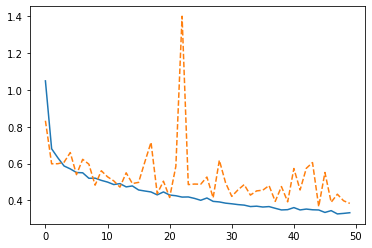

In [312]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '--')

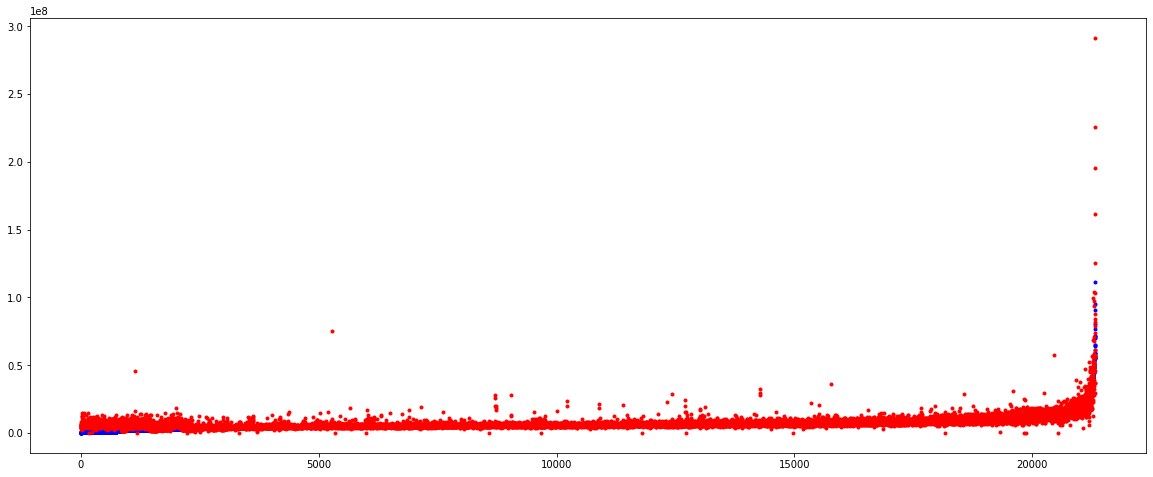

In [313]:
pred = pd.DataFrame(model.predict(X_tra))
plt.figure(figsize=(20,8))
plt.plot(Y_tra['price_doc'] * std,'b.')
plt.plot(pred[0] * std,'r.')

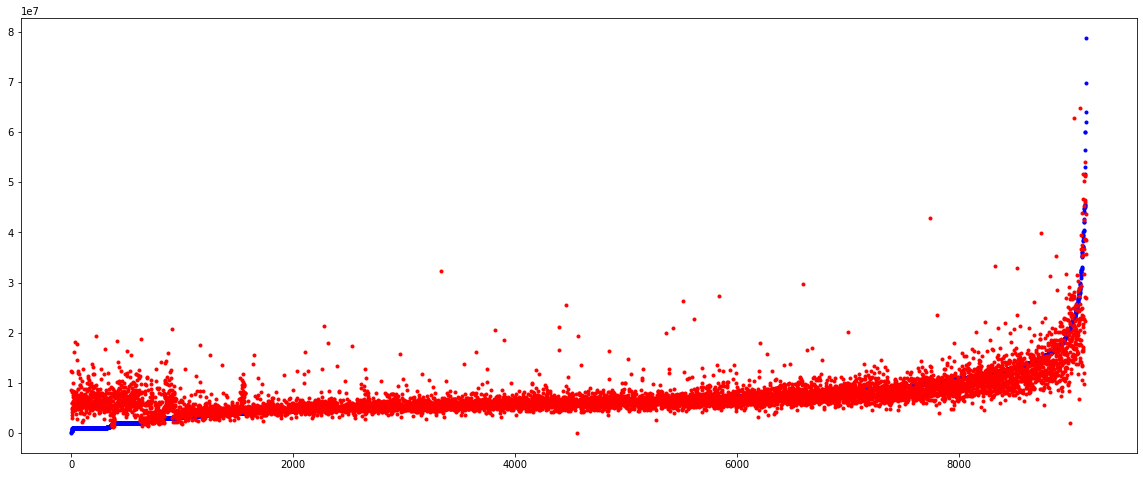

In [314]:
pred = pd.DataFrame(model.predict(X_val))
plt.figure(figsize=(20,8))
plt.plot(Y_val['price_doc'] * std,'b.')
plt.plot(pred[0] * std,'r.')

### Second NN Model with LSTM

In [316]:
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Input,Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D, BatchNormalization,LSTM,Bidirectional
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D,UpSampling1D, Conv1DTranspose,GaussianNoise 
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import Callback
from keras.regularizers import l2 , l1, l1_l2
from keras.utils.vis_utils import plot_model

#batch_size = 32
learning_rate = 0.001

model = keras.Sequential()

model.add(Dense(x_train.shape[1], activation='relu', input_shape=(x_train.shape[1],1)))
model.add(BatchNormalization())
#model.add(Dropout(0.5))

model.add(LSTM(128 , return_sequences=True))
model.add(LSTM(64 , return_sequences=True)) 
model.add(LSTM(32 , return_sequences=True)) 

model.add(GlobalAveragePooling1D())
#model.add(Dropout(0.5))

model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()

plot_model(model, "lstm.png", show_shapes=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 293, 293)          586       
                                                                 
 batch_normalization_60 (Bat  (None, 293, 293)         1172      
 chNormalization)                                                
                                                                 
 lstm_3 (LSTM)               (None, 293, 128)          216064    
                                                                 
 lstm_4 (LSTM)               (None, 293, 64)           49408     
                                                                 
 lstm_5 (LSTM)               (None, 293, 32)           12416     
                                                                 
 global_average_pooling1d_1   (None, 32)               0         
 (GlobalAveragePooling1D)                            

In [ ]:
history = model.fit(X_tra, Y_tra['price_doc'], validation_data=(X_val, Y_val['price_doc']), epochs=50)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '--')

In [ ]:
pred = pd.DataFrame(model.predict(X_tra))
plt.figure(figsize=(20,8))
plt.plot(Y_tra['price_doc'] * std,'b.')
plt.plot(pred[0] * std,'r.')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE = mean_squared_error(Y_tra, pred)
MAE = mean_absolute_error(Y_tra, pred)

print(f'\nMSE Y_tra: {MSE}\n')
print(f'MAE Y_tra: {MAE}')

In [ ]:
pred = pd.DataFrame(model.predict(X_val))
plt.figure(figsize=(20,8))
plt.plot(Y_val['price_doc'] * std,'b.')
plt.plot(pred[0] * std,'r.')

In [ ]:
MSE = mean_squared_error(Y_val, pred)
MAE = mean_absolute_error(Y_val, pred)

print(f'\nMSE Y_val: {MSE}\n')
print(f'MAE Y_val: {MAE}')

# LinearRegression

In [305]:
from sklearn.linear_model import LinearRegression
lModel = LinearRegression().fit(x_train, y_train)

score = lModel.score(x_train, y_train)
print("Training score: ", score)

Training score:  0.4540106140349257


In [ ]:
y_pred = lModel.predict(x_test)
#y_pred = np.expm1(y_pred * 0.99)
output = pd.DataFrame({'id': id_test, 'price_doc': y_pred})
output.head()

output.to_csv('lModel.csv', index=False)

# RandomForest

In [307]:
from sklearn.ensemble import RandomForestRegressor

rfModel = RandomForestRegressor()
rfModel.fit(x_train, y_train)
score = rfModel.score(x_train, y_train)
print("\n\nTraining score: ", score)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.




Training score:  0.9550745301119077
